# kmerExtractor user manual

Below we present examples of how to use the main functions of the software.

## Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# software to extract the k-mers
import kmerExtractor as kex

## Compute k-mers

Specify the corresponding directory of the FASTA files from which you want to extract the k-mers, and the directory where you want to save the output files. Also define the window size (in base pairs) for which you want the frequency of k-mers to be counted. 

In this case we will use the genome of arabidospsis, tomato and maize, with a window size of $100000$ bp for all genomes.

In [2]:
filepath_ara = '../input_data/arabidopsis_genome.fasta'
filepath_tom = '../input_data/tomato_genome.fasta'
filepath_mz = '../input_data/maize_genome.fasta'
output_path = '../output_data'
window_size = 100_000

Now use the `kmers_by_window_opt` function to calculate the k-mers of each genome for the $k$ of your choice.

In the output file, the first column indicates the chromosome, the second column the window index, the third and fourth columns indicate the start and end position of the window respectively, and the rest of the $4^k$ columns correspond to the k-mer frequencies. This data is saved in a csv file and stored in a dataframe for downstream analysis within the tutorial.

 
The resulting dataframe for arabidopsis 2-mers looks like shown below.

In [3]:
df_2mers_ara = kex.kmers_by_window_opt(filepath_ara, k=2, window_size=window_size, output_path=output_path)
df_2mers_tom = kex.kmers_by_window_opt(filepath_tom, k=2, window_size=window_size, output_path=output_path)
df_2mers_mz  = kex.kmers_by_window_opt(filepath_mz,  k=2, window_size=window_size, output_path=output_path)
df_2mers_ara

100%|██████████████████████████████████████| 25502007/25502007 [12:31<00:00, 33940.82it/s]


,chromosome,window,start,end,AA,AC,AG,AT,CA,CC,CG,CT,GA,GC,GG,GT,TA,TC,TG,TT
0,chr1,0,1,100000,11617,5201,5956,9480,6269,3277,2412,5588,6375,2998,3460,5248,7993,6069,6253,11803
1,chr1,1,100001,200000,10857,5241,5871,8727,6080,3516,2983,5895,6670,3174,3758,5578,7089,6544,6567,11449
2,chr1,2,200001,300000,10623,5144,6129,8658,6350,3575,2655,6386,6617,3378,3616,5325,6964,6869,6536,11174
3,chr1,3,300001,400000,9548,5117,6328,7979,6483,4297,2771,6834,6625,3923,4047,5310,6315,7049,6759,10614
4,chr1,4,400001,500000,11515,5294,5692,9068,6225,3578,2638,5896,6455,3027,3592,5271,7375,6438,6422,11513
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1190,chr5,267,26700001,26800000,11432,5154,5970,9120,6440,3528,2620,5942,6521,3051,3289,5280,7283,6797,6262,11310
1191,chr5,268,26800001,26900000,11549,5299,5782,9116,6113,3457,2948,5881,6405,3068,3254,5222,7680,6575,5965,11685
1192,chr5,269,26900001,26975502,8826,4001,4609,6658,4719,2639,2158,4387,5163,2352,2573,3979,5386,4912,4726,8413
1193,chr5,269,26900001,26975502,8826,4001,4609,6658,4719,2639,2158,4387,5163,2352,2573,3979,5386,4913,4726,8413


However, a most natural approach is to use $k=3$, since the 3-mers represent codons, which encode for amino acids or signal the termination of protein synthesis (stop signals).

The resulting dataframe for arabidopsis 3-mers looks like below.

In [4]:
df_3mers_ara = kex.kmers_by_window_opt(filepath_ara,k=3,window_size=window_size,output_path=output_path)
df_3mers_tom = kex.kmers_by_window_opt(filepath_tom,k=3,window_size=window_size,output_path=output_path)
df_3mers_mz = kex.kmers_by_window_opt(filepath_mz,k=3,window_size=window_size,output_path=output_path)
df_3mers_ara

100%|██████████████████████████████████████| 25502007/25502007 [15:53<00:00, 26741.24it/s]


,chromosome,window,start,end,AAA,AAC,AAG,AAT,ACA,ACC,...,TCG,TCT,TGA,TGC,TGG,TGT,TTA,TTC,TTG,TTT
0,chr1,0,1,100000,4415,1966,2228,3008,1926,1096,...,776,2200,2016,1007,1349,1881,2682,2169,2422,4530
1,chr1,1,100001,200000,4026,1914,2114,2803,1849,1063,...,959,2339,2102,957,1432,2076,2324,2283,2489,4353
2,chr1,2,200001,300000,3899,1875,2138,2711,1863,1066,...,932,2572,2098,1085,1390,1963,2255,2477,2322,4120
3,chr1,3,300001,400000,3335,1760,2117,2336,1729,1110,...,833,2586,2041,1313,1456,1949,1998,2398,2334,3884
4,chr1,4,400001,500000,4629,1874,2085,2926,1929,1075,...,885,2301,2109,988,1406,1919,2499,2241,2414,4359
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1190,chr5,267,26700001,26800000,4301,2000,2180,2951,1818,1114,...,891,2453,2014,1028,1297,1922,2394,2385,2340,4191
1191,chr5,268,26800001,26900000,4423,1999,2061,3066,1835,1072,...,973,2304,1962,937,1221,1845,2695,2302,2196,4492
1192,chr5,269,26900001,26975502,3366,1522,1803,2135,1467,797,...,704,1734,1585,738,960,1443,1861,1717,1716,3119
1193,chr5,269,26900001,26975502,3366,1522,1803,2135,1467,797,...,704,1734,1585,738,960,1443,1861,1717,1716,3119


## Read k-mer files if already computed

Calculating k-mers can take longer for larger genomes. That's why you also have the option to load previously saved files, so you don't have to recalculate the k-mers every time you want to plot some figures or do further analysis.

In [5]:
df_2mers_ara = pd.read_csv(output_path +'/CGRW_k2_arabidopsis_genome.csv')
df_2mers_tom = pd.read_csv(output_path +'/CGRW_k2_tomato_genome.csv')
df_2mers_mz = pd.read_csv(output_path +'/CGRW_k2_maize_genome.csv')

df_3mers_ara = pd.read_csv(output_path +'/CGRW_k3_arabidopsis_genome.csv')
df_3mers_tom = pd.read_csv(output_path +'/CGRW_k3_tomato_genome.csv')
df_3mers_mz = pd.read_csv(output_path +'/CGRW_k3_maize_genome.csv')

## Group all windows within each chromosome

If you don't want the k-mer frequencies by windows within the chromosomes, you can get the cumulative frequencies for each chromosome as shown in the cell below. For example, the resulting dataframe for arabidopsis would have only 5 rows corresponding to its 5 chromosomes.

In [6]:
df_2mers_ara_bychr = df_2mers_ara.groupby('chromosome').agg({k:'sum' for k in df_2mers_ara.columns[4:]})
df_2mers_tom_bychr = df_2mers_tom.groupby('chromosome').agg({k:'sum' for k in df_2mers_tom.columns[4:]})
df_2mers_mz_bychr = df_2mers_mz.groupby('chromosome').agg({k:'sum' for k in df_2mers_mz.columns[4:]})
df_2mers_ara_bychr

,AA,AC,AG,AT,CA,CC,CG,CT,GA,GC,GG,GT,TA,TC,TG,TT
chromosome,,,,,,,,,,,,,,,,
chr1,3519572,1588202,1794811,2806911,1923811,1016038,697362,1798090,1930160,902322,1008839,1579754,2335983,1928721,1920061,3512205
chr2,2291405,1029105,1160640,1834416,1246754,672290,457569,1166315,1249456,584680,660355,1026228,1527955,1256858,1242154,2289303
chr3,2697289,1228414,1405644,2153303,1498561,804334,559027,1396347,1516501,714668,805341,1226134,1772296,1510857,1492635,2672182
chr4,2143926,980389,1109010,1707158,1184064,637226,439583,1110444,1195069,560350,630128,970513,1417419,1193357,1177332,2125863
chr5,3140913,1410681,1608073,2510382,1712226,907201,634608,1605965,1741333,808346,914520,1422652,2075592,1733770,1729636,3160014


## Group all chromosomes

Furthermore, you can pool the k-mer frequencies of all the chromosomes and have the cumulative counts of the entire sequence.

In [7]:
df_2mers_all = pd.DataFrame()
df_2mers_all['arabidopsis'] = df_2mers_ara_bychr.sum()
df_2mers_all['tomato'] = df_2mers_tom_bychr.sum()
df_2mers_all['maize'] = df_2mers_mz_bychr.sum()
df_2mers_all.T

,AA,AC,AG,AT,CA,CC,CG,CT,GA,GC,GG,GT,TA,TC,TG,TT
arabidopsis,13793105,6236791,7078178,11012170,7565416,4037089,2788149,7077161,7632519,3570366,4019183,6225281,9129245,7623563,7561818,13759567
tomato,85677817,37700236,41002572,75901364,45946447,25138712,11804902,40969026,42920385,18121904,25183170,37739813,65737185,42898271,45974544,85737480
maize,161563751,108257047,128688710,136989307,133796230,120957040,87977339,128781627,129723428,112442579,121098322,108465666,110415392,129855155,133966157,161938131


## k-mer figures

### Plot k-mers across windows

With the `plot_kmers_across_windows` function you can plot the frequencies of the k-mers of your choice across the windows of a specified chromosome.

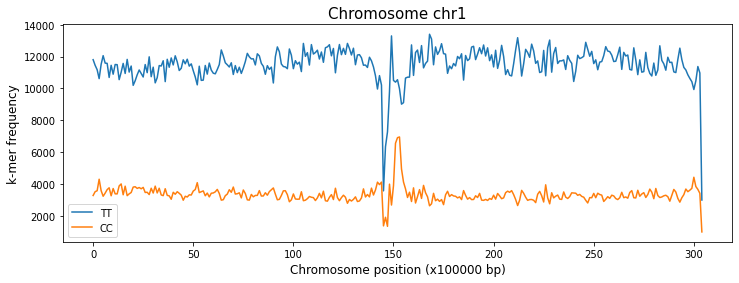

In [8]:
a = kex.plot_kmers_across_windows(df_2mers_ara,['TT','CC'],'chr1')

You can also use this function to compare, placing the plot of different chromosomes on different axes within the same figure.

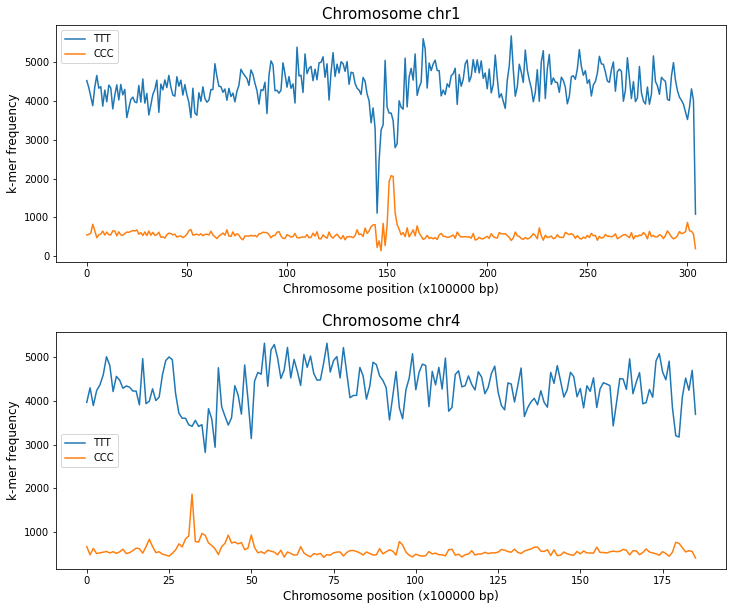

In [9]:
fig,ax = plt.subplots(2,1,figsize=(12,10),gridspec_kw={'hspace': 0.3})

kex.plot_kmers_across_windows(df_3mers_ara,['TTT','CCC'],'chr1',ax=ax[0])
kex.plot_kmers_across_windows(df_3mers_ara,['TTT','CCC'],'chr4',ax=ax[1])

plt.show()

### Plot k-mer frequencies within each chromosome

The `plot_kmers_freq_within_chromosomes` function makes a stacked bar graph of the frequency of different k-mers per chromosome. For the same k-mer, each stacked bar represents a different chromosome of the corresponding color.

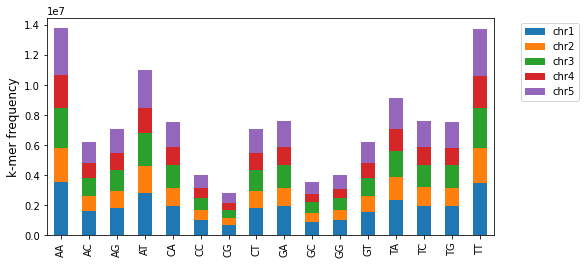

In [10]:
b = kex.plot_kmers_freq_within_chromosomes(df_2mers_ara,figsize=(8,4))

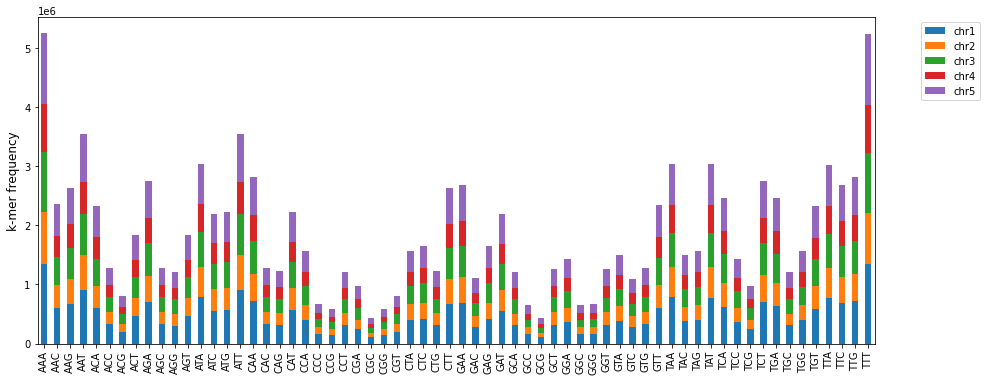

In [11]:
c = kex.plot_kmers_freq_within_chromosomes(df_3mers_ara)

### Plot FCGR structure

The technique to show the k-mer frequencies as images is known as Frequency Chaos Game Representation (FCGR). It corresponds to a matrix of dimensions $2^k \times 2^k$; with the upper left corner equal to the k-mer of C, the upper right corner the k-mer of G, the lower left corner the k-mer of A, and the lower right corner the k-mer of T.

The `plot_FCGR` function plots the FCGR of a sequence as a heatmap that allows to appreciate the relative frequencies of each k-mer. You can plot the FCGR for a specific chromosome and window, the cumulative frequency for an entire chromosome (if no window is specified), or the cumulative frequency for the entire genome (if neither chromosome nor window is specified).

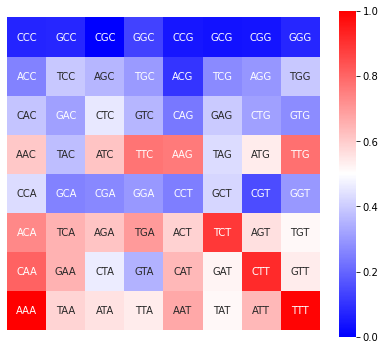

In [12]:
d = kex.plot_FCGR(df_3mers_ara,'chr1',window=145)

You can also adjust the size of the figure and the colormap to your preference as shown below

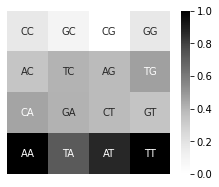

In [13]:
e = kex.plot_FCGR(df_2mers_tom,'chr6',figsize=(4,3),colormap='Greys')

Aditionally, is possible compare the FCGR of multiple genomes as shown in the following cell

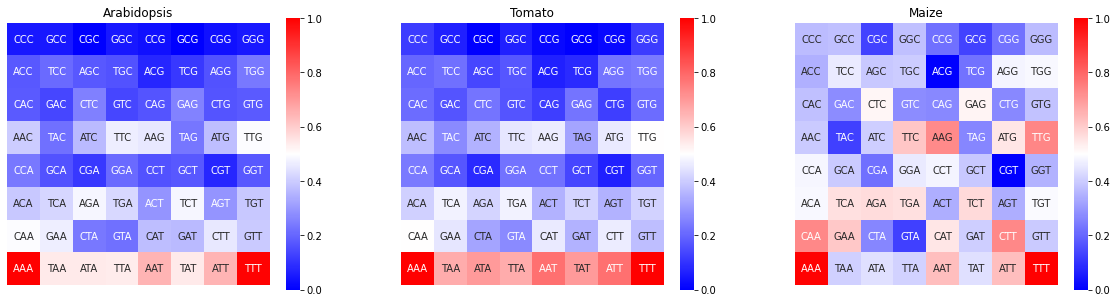

In [14]:
fig,ax = plt.subplots(1,3,figsize=(20,5))

kex.plot_FCGR(df_3mers_ara,ax=ax[0])
kex.plot_FCGR(df_3mers_tom,ax=ax[1])
kex.plot_FCGR(df_3mers_mz,ax=ax[2])

ax[0].set_title('Arabidopsis')
ax[1].set_title('Tomato')
ax[2].set_title('Maize')

plt.show()

### Plot CGR

Finally, although it is not the main objective of the software, a function to generate the CGR image of a sequence is included. In the following example, the FASTA file of the Arabidopsis genome is read and the CGR of the first 100 kb is generated.

100%|████████████████████████████████████████| 100000/100000 [00:00<00:00, 1886046.78it/s]


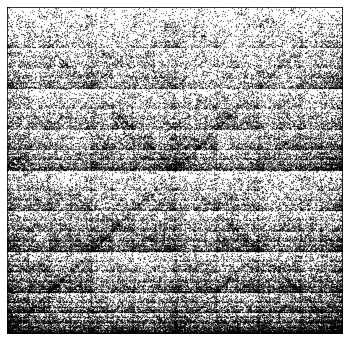

In [15]:
import re

# Read FASTA file with complete genome separated by chromosomes
f_in = open(filepath_ara, 'r')
all_file = f_in.read()
f_in.close()

# join lines
seq_all = "".join(all_file.split("\n"))
del all_file

# Split sequence by chromosomes
seq_bychr = re.split('>chr[1-9]*', seq_all)[1:]
del seq_all

# plot CGR of the first chromosome, first window (first 100 Kb)
f = kex.plot_CGR(seq_bychr[0][:100_000],markersize=0.2)